In [1]:
# 경고 무시 모듈
import warnings

# 경고를 무시
warnings.filterwarnings(action='ignore')

import pandas as pd
import geopandas as gpd
import os

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import numpy as np
import pandas as pd
import geopandas as gpd
from fiona.crs import from_epsg # 좌표변환 
import contextily as ctx
from geopy.distance import great_circle # 직선거리를 계산
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium

In [3]:
import mapclassify as mc #단계구분도에 내추럴브레이크 적용하기 위한 패키지
import geoplot as gplt
import geoplot.crs as gcrs

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '01_의료취약지역_산출.ipynb',
 'DATA',
 '김해시_총_인구',
 '응급',
 '의료지도_GeoPandas_건물_데이터_병합.ipynb',
 '인구격자 결합.ipynb',
 '전처리']

In [5]:
grid = gpd.read_file('./김해시_총_인구/김해시_총_인구.shp', encoding='cp949')

In [6]:
grid = grid[grid['인구수']>0]

In [8]:
point =  gpd.read_file('./응급/응급.shp', encoding='cp949') 

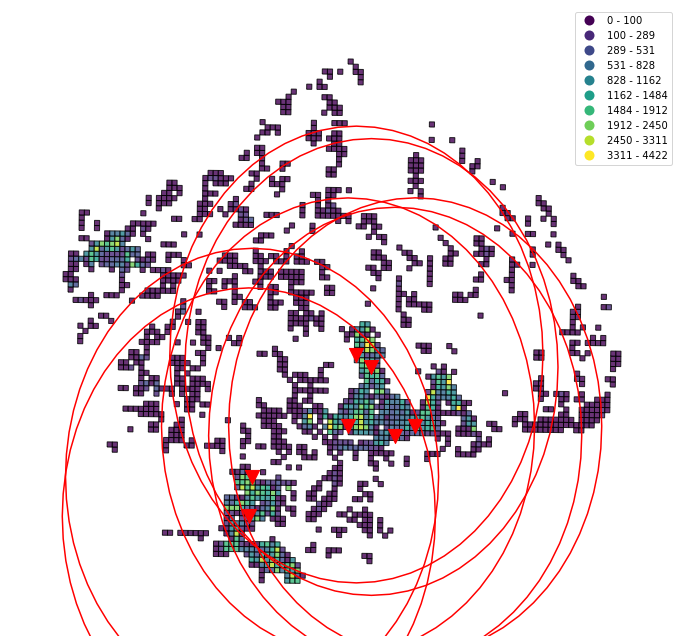

In [19]:
buf_poly = gpd.GeoDataFrame({'geometry': point.buffer(0.1)})  # 응급의료기관 10km 반경 생성

proj = gcrs.WebMercator()

ax = grid.plot(edgecolor = 'Black', linewidth=1, figsize=(12, 12), alpha=0)   # 그리드

#단계구분도 색상 구분 단계 
scheme = mc.NaturalBreaks(grid['인구수'], k=10) 
ext = grid.total_bounds

# 격자 단계구분도
gplt.choropleth(grid, ax=ax, 
                hue='인구수', #cmap='coolwarm',
                scheme=scheme, alpha=0.8, legend=True) 

point.plot(ax=ax, marker='v', color='red', markersize=200, label='Firestation')  # 응급의료기관 포인트
buf_poly.boundary.plot(ax=ax, color='red')   # 응급의료기관 10km 반경
ax.set_axis_off()


plt.show()

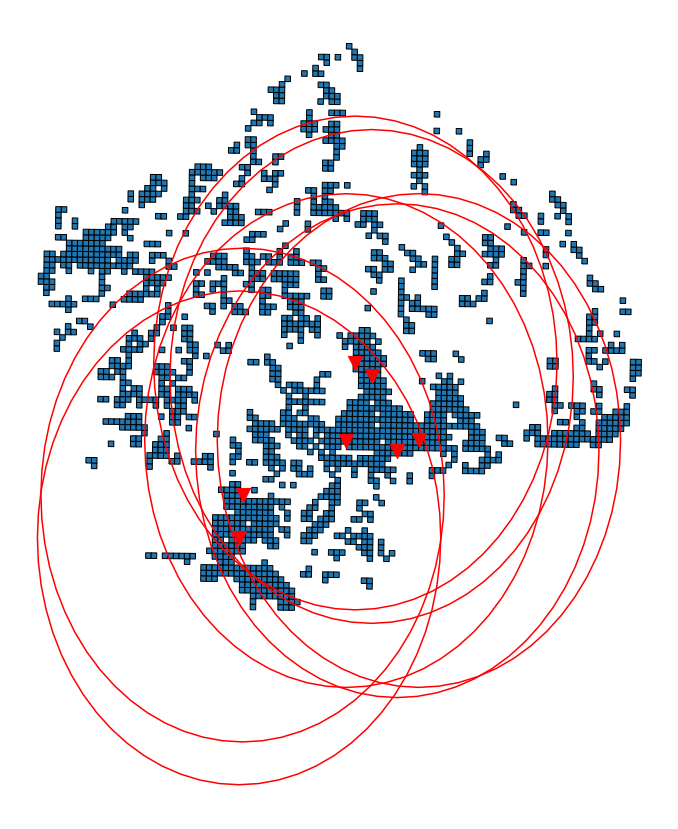

In [69]:
buf_poly = gpd.GeoDataFrame({'geometry': point.buffer(0.1)})  # 응급의료기관 10km 반경 생성

ax = grid.plot(edgecolor = 'Black', linewidth=1, figsize=(15, 15), alpha=1)   # 그리드


point.plot(ax=ax, marker='v', color='red', markersize=200, label='Firestation')  # 응급의료기관 포인트
buf_poly.boundary.plot(ax=ax, color='red')   # 응급의료기관 10km 반경
ax.set_axis_off()
plt.show()

In [102]:
dif_area = gpd.overlay(grid, buf_poly, how='difference')

In [101]:
dif_area

gid    val    인구수  \
0    마라10aa99ba   11.0   11.0   
1    마라10ab97ba   19.0   19.0   
2    마라10ab97bb   10.0   10.0   
3    마라10ab98ab    6.0    6.0   
4    마라10ab99ba  118.0  118.0   
..          ...    ...    ...   
329  마마34ab01aa   19.0   19.0   
330  마마34ba00ba   44.0   44.0   
331  마마34ba00bb    6.0    6.0   
332  마마34bb00ba    6.0    6.0   
333  마마35bb00aa   19.0   19.0   

                                              geometry  
0    POLYGON ((128.70964 35.28495, 128.70967 35.287...  
1    POLYGON ((128.71212 35.26690, 128.71215 35.269...  
2    POLYGON ((128.71215 35.26915, 128.71218 35.271...  
3    POLYGON ((128.71222 35.27366, 128.71225 35.275...  
4    POLYGON ((128.71238 35.28493, 128.71242 35.287...  
..                                                 ...  
329  POLYGON ((128.97648 35.29552, 128.97652 35.297...  
330  POLYGON ((128.97915 35.29098, 128.97919 35.293...  
331  POLYGON ((128.97919 35.29323, 128.97923 35.295...  
332  POLYGON ((128.98189 35.29094, 128.98194 35.293...  
333  POLYGON ((128.99281 35.28630, 128.99285 35.288...  

[334 rows x 4 columns]

In [105]:
dif_area = dif_area.sort_values('인구수', ascending=False)

In [106]:
dif_area.reset_index(drop=True, inplace=True)

In [107]:
dif_area

gid     val     인구수  \
0    마마12aa02ab  2683.0  2683.0   
1    마마11aa02aa  2500.0  2500.0   
2    마마12aa02ba  2264.0  2264.0   
3    마마11ab02ab  2190.0  2190.0   
4    마마12bb01ab  2146.0  2146.0   
..          ...     ...     ...   
329  마마17aa05ba     6.0     6.0   
330  마마29ba06ba     6.0     6.0   
331  마마13ba01bb     6.0     6.0   
332  마마13ba02ba     6.0     6.0   
333  마마16aa02bb     6.0     6.0   

                                              geometry  
0    POLYGON ((128.73200 35.30952, 128.73203 35.311...  
1    POLYGON ((128.72097 35.30738, 128.72100 35.309...  
2    POLYGON ((128.73203 35.31178, 128.73207 35.314...  
3    POLYGON ((128.72375 35.30961, 128.72379 35.311...  
4    POLYGON ((128.74011 35.30042, 128.74015 35.302...  
..                                                 ...  
329  POLYGON ((128.78745 35.33825, 128.78749 35.340...  
330  POLYGON ((128.92512 35.34572, 128.92516 35.347...  
331  POLYGON ((128.74843 35.30485, 128.74846 35.307...  
332  POLYGON ((128.74853 35.31161, 128.74857 35.313...  
333  POLYGON ((128.77610 35.31583, 128.77726 35.315...  

[334 rows x 4 columns]